In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
import os
os.environ['OMP_NUM_THREADS'] = '6'

In [37]:
df = pd.read_csv('HR_Analytics.csv')
df.head(6)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0


In [38]:
imputer = SimpleImputer(strategy='mean') 
df['YearsAtCompany'] = imputer.fit_transform(df[['YearsAtCompany']])  
df['Education'] = imputer.fit_transform(df[['Education']]) 

In [39]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
0,18,230,3,3.0,1,405,3,54,3,1,...,False,False,False,False,False,True,False,False,True,False
1,18,812,10,3.0,1,411,4,69,2,1,...,False,False,False,True,False,True,False,False,True,False
2,18,1306,5,3.0,1,614,2,69,3,1,...,False,False,False,True,False,True,False,False,True,True
3,18,287,5,2.0,1,1012,2,73,3,1,...,False,True,False,False,False,True,False,False,True,False
4,18,247,8,1.0,1,1156,3,80,3,1,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,422,7,3.0,1,549,1,41,3,5,...,False,False,False,False,True,False,True,False,False,False
1476,60,1499,28,3.0,1,573,3,80,2,3,...,False,False,True,False,True,False,False,False,False,False
1477,60,1179,16,4.0,1,732,1,84,3,2,...,False,False,True,False,False,True,False,True,False,False
1478,60,696,7,4.0,1,1233,2,52,4,2,...,False,False,True,False,False,False,False,True,False,True


In [40]:
scaler = StandardScaler()
numerical_columns = ['Age', 'YearsAtCompany', 'DailyRate', 'DistanceFromHome'] 
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [41]:
#outlier detection
z_scores = np.abs(stats.zscore(df[numerical_columns]))
df = df[(z_scores < 3).all(axis=1)]

In [53]:
#dimesionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(df[numerical_columns] )


In [43]:
inertia = []  # To store the inertia values for Elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

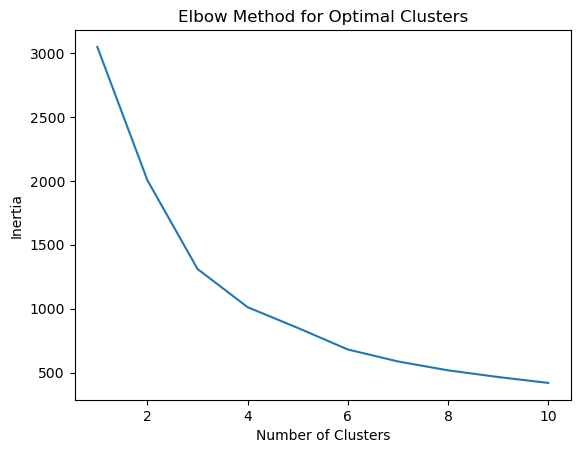

In [44]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, n_init=10)
df.loc[:, 'Cluster'] = kmeans.fit_predict(pca_features)

C:\Users\Hema Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [47]:
sil_score = silhouette_score(pca_features, df['Cluster'])
davies_bouldin = davies_bouldin_score(pca_features, df['Cluster'])
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.3511849189741559
Davies-Bouldin Index: 0.9193966135468074


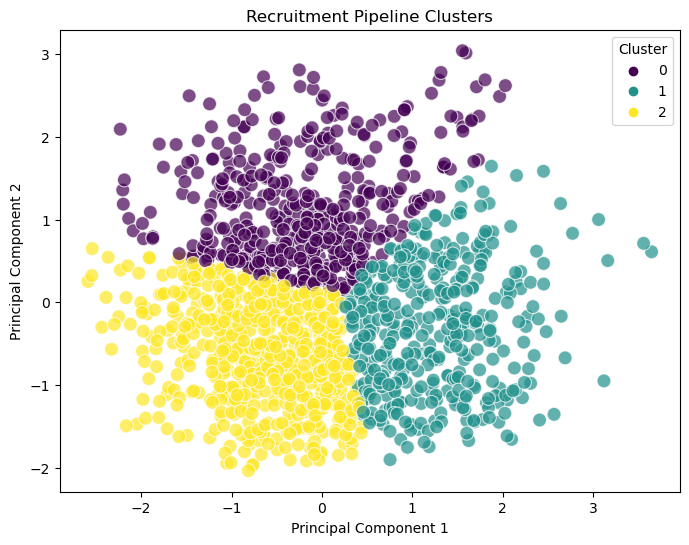

In [48]:
plt.figure(figsize=(8,6))

# Use PCA components as the x and y axis labels
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)

# Set a simple title and appropriate axis labels
plt.title('Recruitment Pipeline Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster", loc='best')
plt.show()

In [49]:
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster].describe())


Cluster 2 Summary:
              Age   DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  618.000000  618.000000        618.000000  618.000000          618.0   
mean    -0.658574    0.330604         -0.440565    2.775081            1.0   
std      0.601439    0.866898          0.626494    1.054231            0.0   
min     -2.073050   -1.668486         -1.011296    1.000000            1.0   
25%     -1.086800   -0.365727         -0.888271    2.000000            1.0   
50%     -0.648467    0.407244         -0.642222    3.000000            1.0   
75%     -0.210133    1.051179         -0.150123    4.000000            1.0   
max      0.776117    1.723651          2.064320    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      618.000000               618.000000  618.000000      618.000000   
mean      1024.276699                 2.802589   65.802589        2.737864   
std        612.255918                 1.084